In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
feature=list(set(VarNames[1:]).difference(RawNames))



df=pd.read_csv('SUSY-small.csv',dtype='float64',names=VarNames)
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


In [3]:
df.columns

Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')

In [4]:
low_f=['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi']

high_f=['MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']

**5.1**

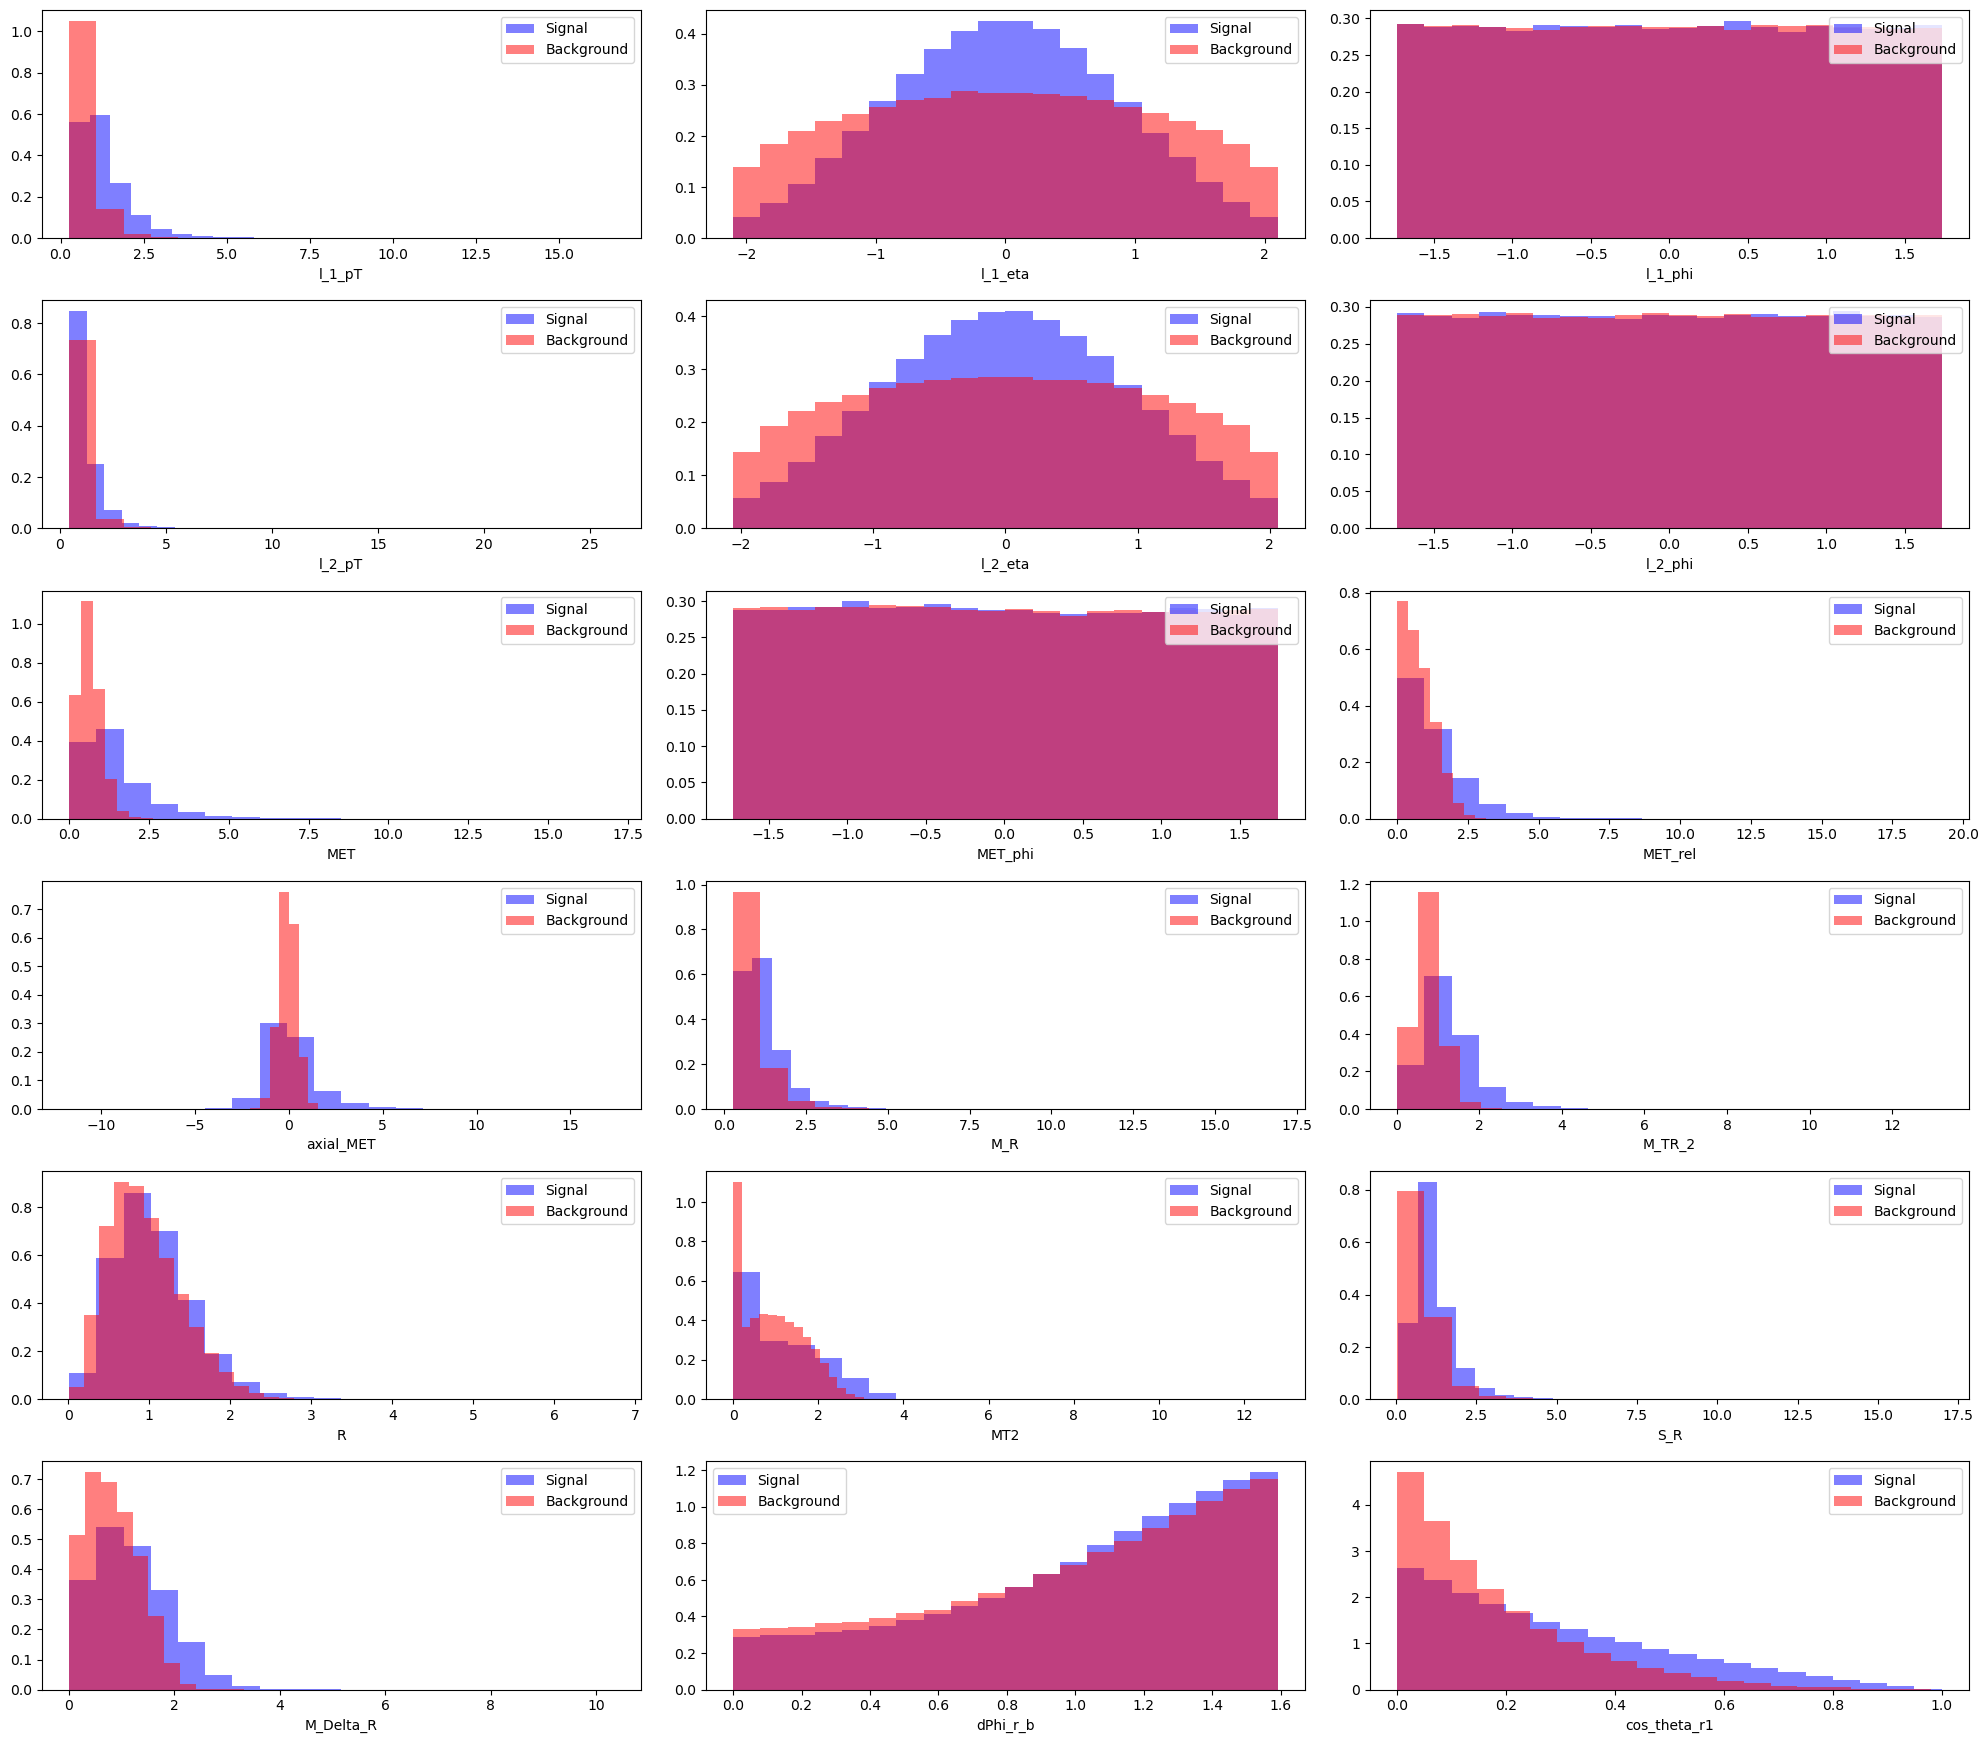

In [23]:
# x<x_c

plt.figure(figsize=(20,20))

values=['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']

for i,columns in enumerate(values):
       plt.subplot(7,3,i+1)
       plt.hist(df[df.signal==1][columns],bins=20,alpha=0.5, density=True,color='blue',label='Signal')
       plt.hist(df[df.signal==0][columns],bins=20,alpha=0.5, density=True,color='red',label='Background')
       
       plt.xlabel(columns)
       plt.legend()

plt.tight_layout()
plt.show()


**5.2**

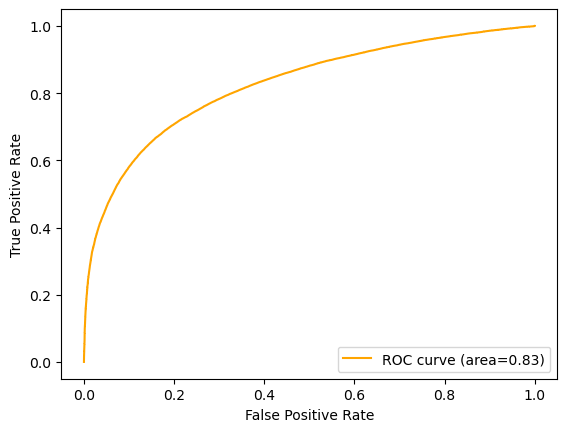

In [25]:
## 5.2

from sklearn.metrics import roc_curve, auc

fpr,tpr,_=roc_curve(y_test,Fisher.decision_function(X_test))
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='orange',label='ROC curve (area=%.2f)'%roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

**5.3**

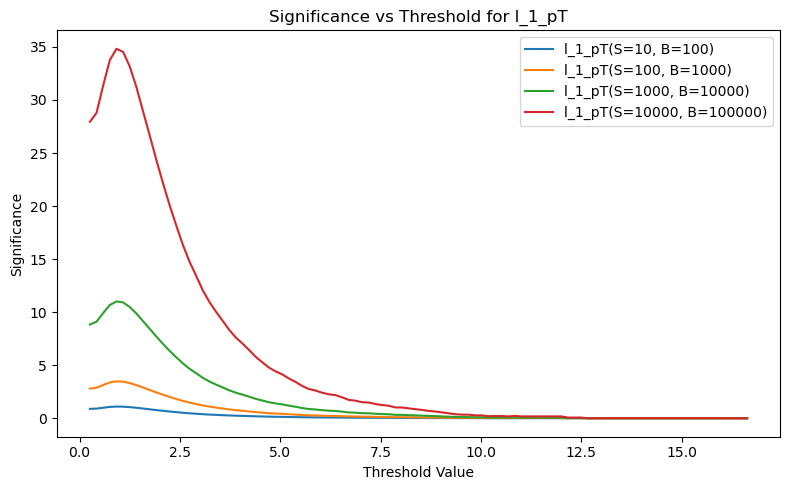

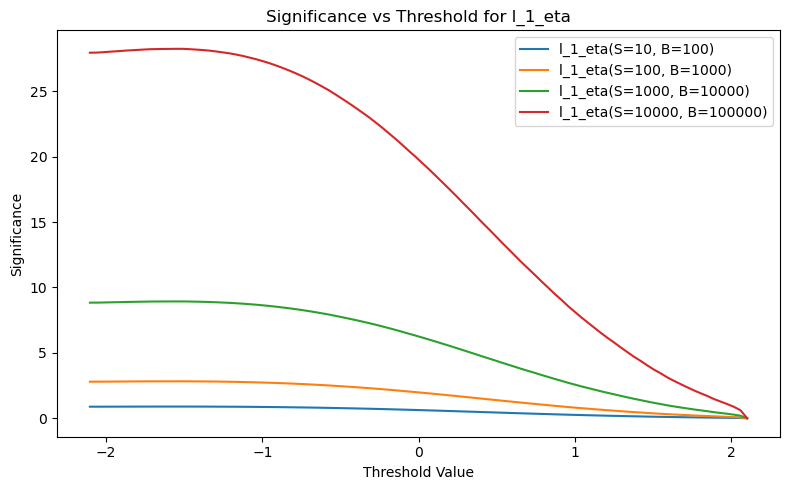

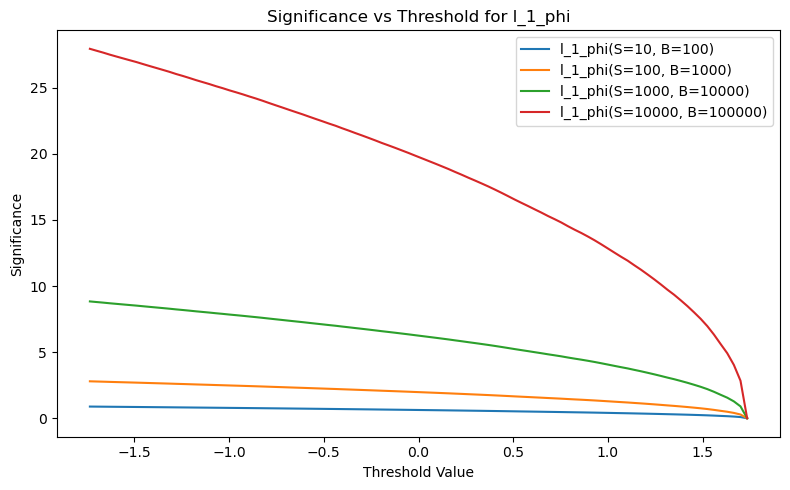

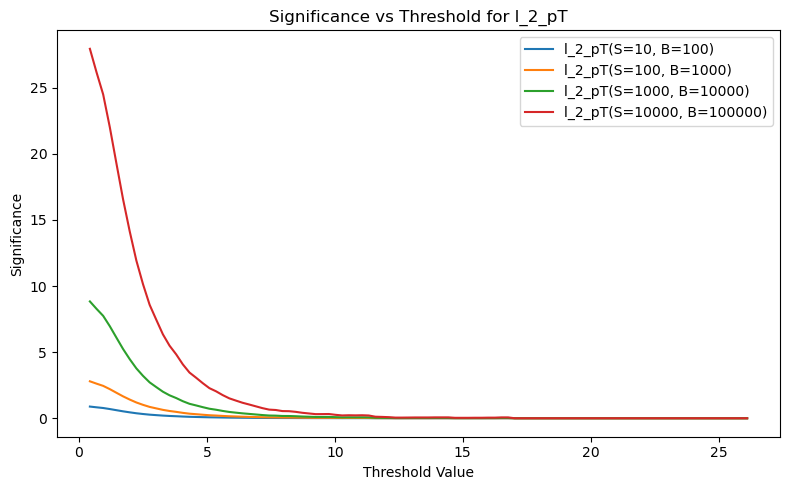

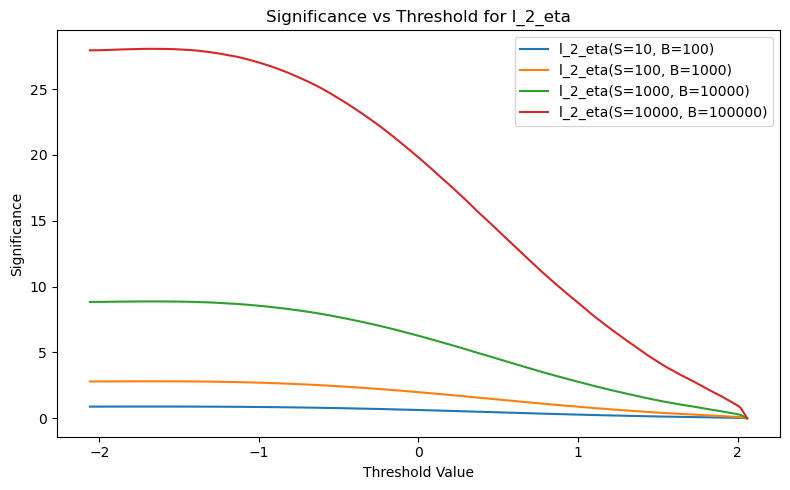

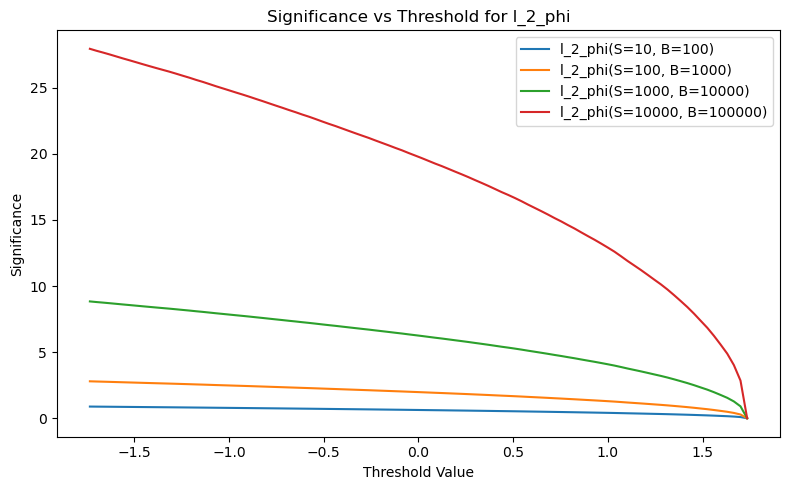

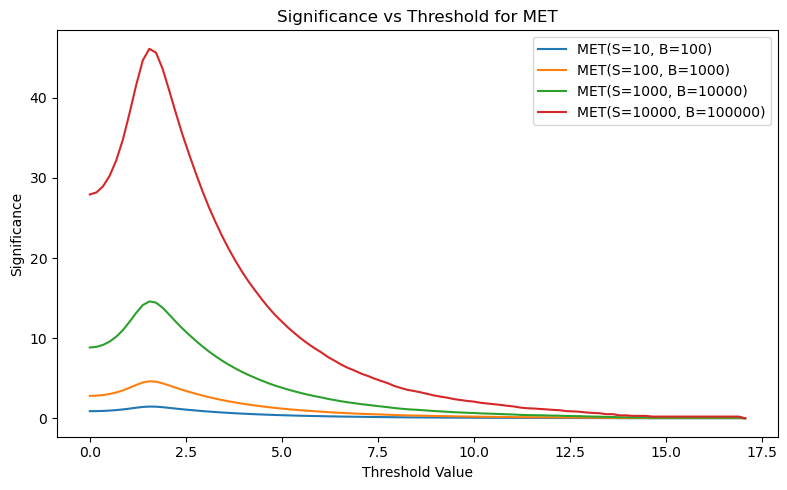

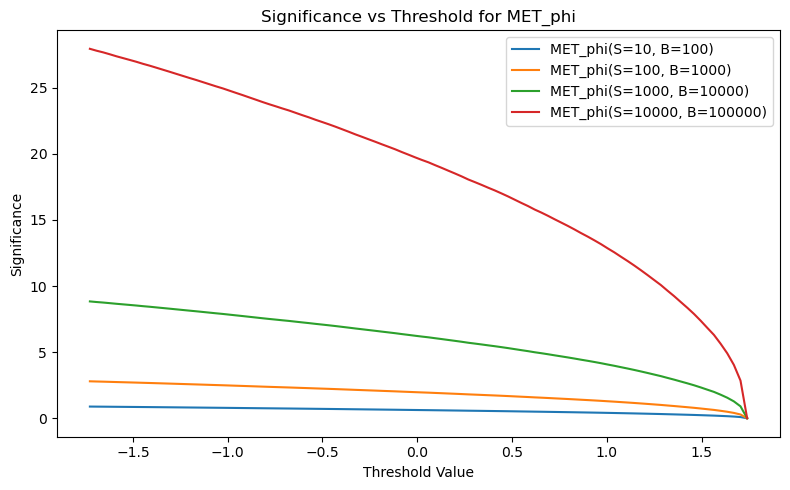

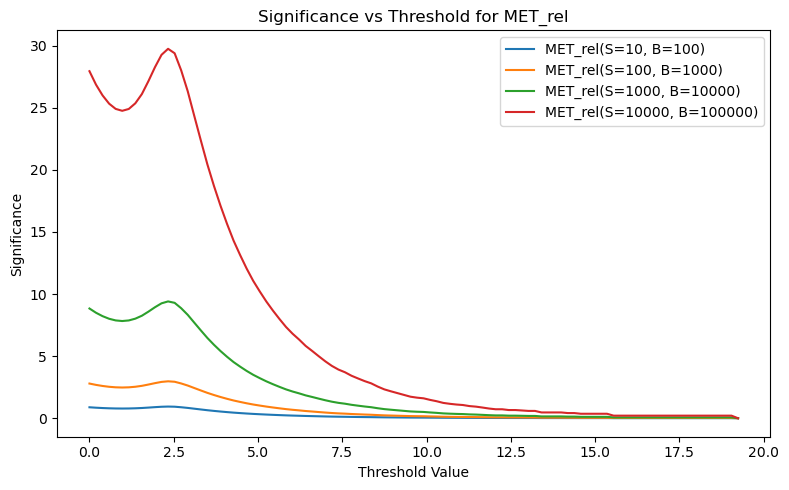

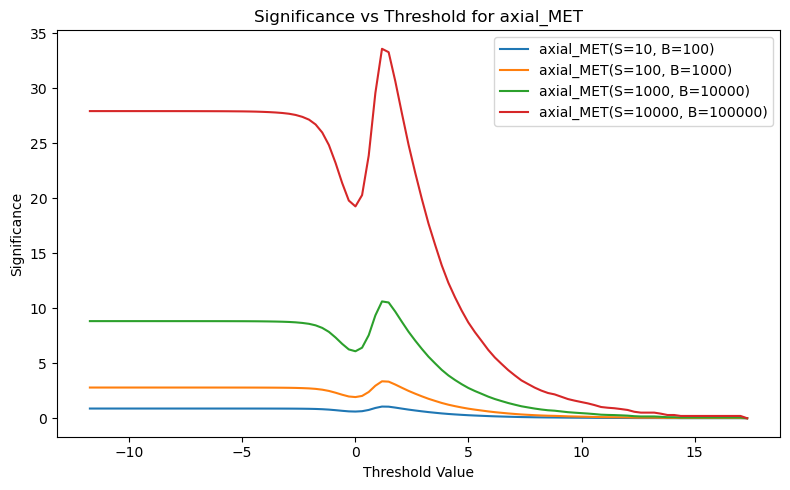

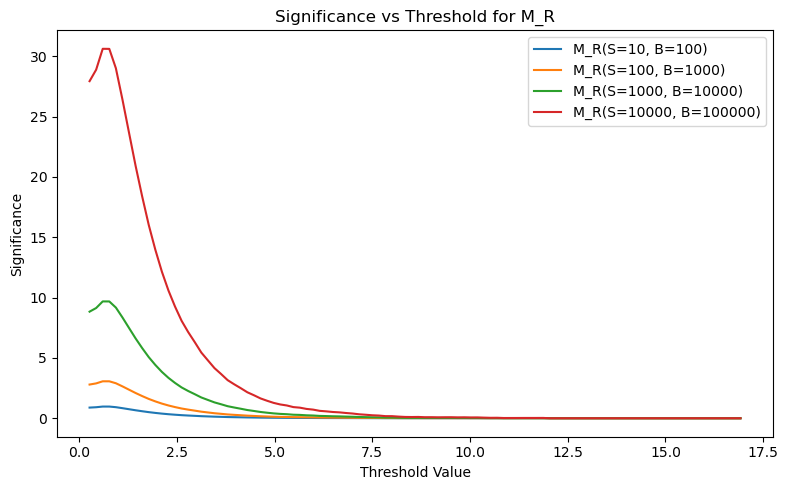

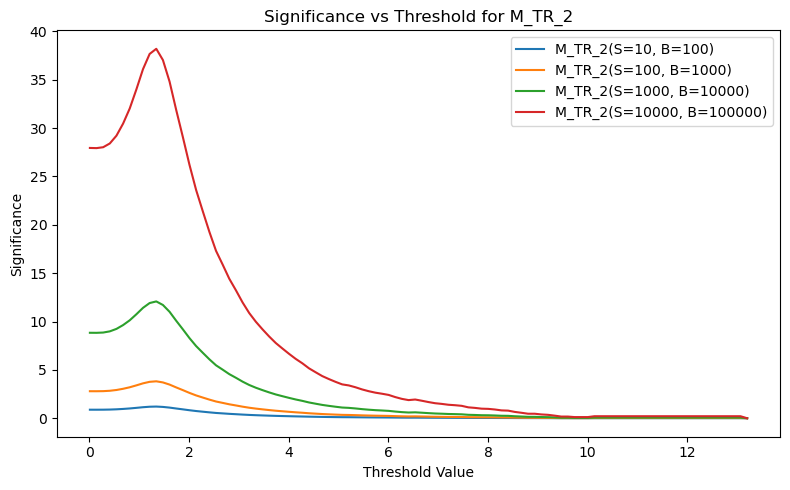

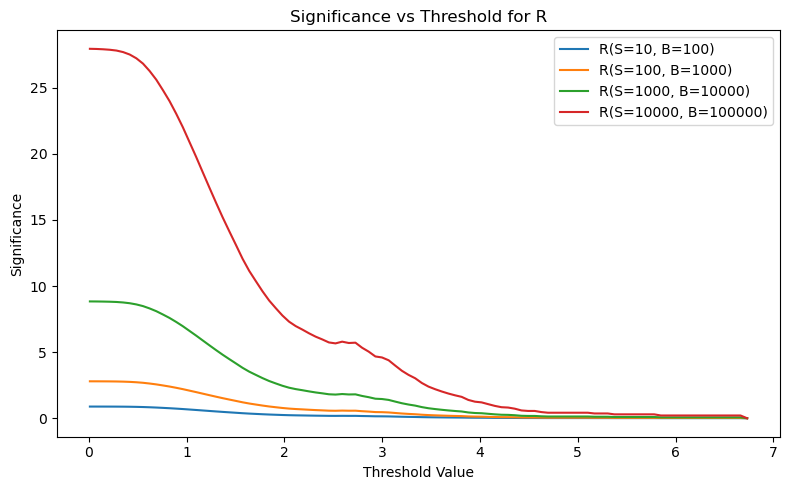

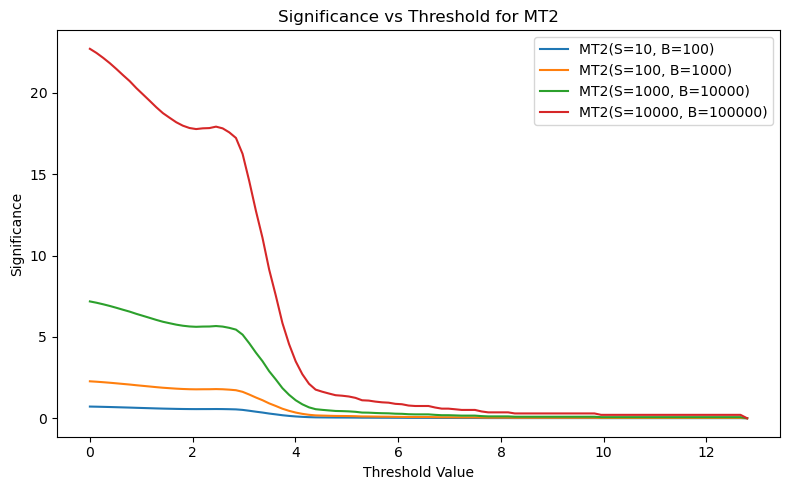

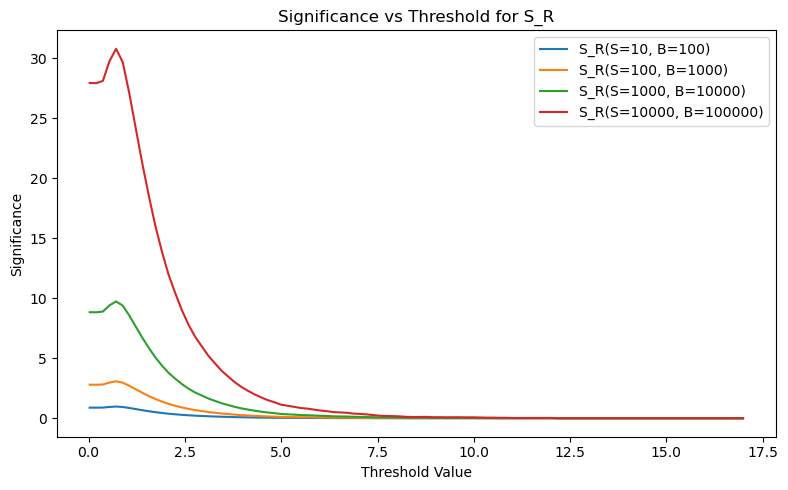

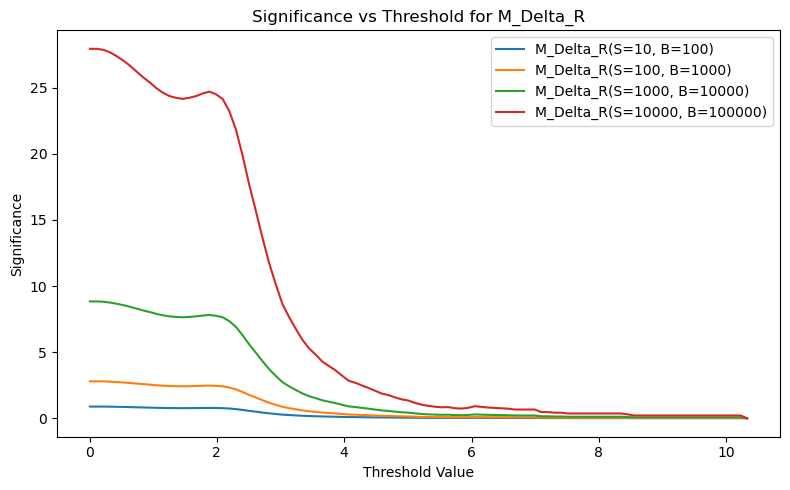

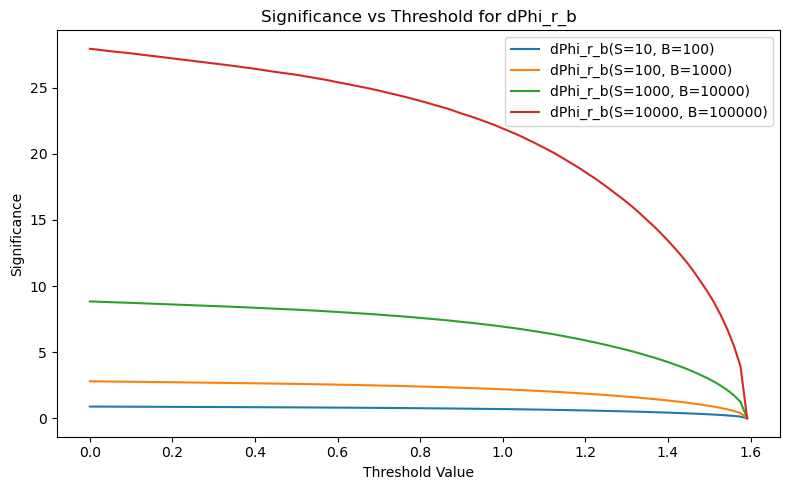

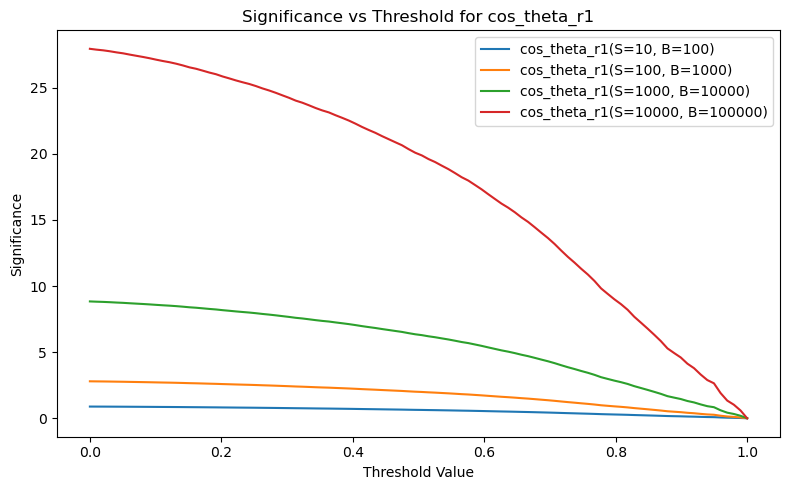

In [26]:
import numpy as np
import matplotlib.pyplot as plt

sig=df[df.signal==1]
bck=df[df.signal==0]

observ=['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']
scenarios=[(10, 100),(100, 1000),(1000, 10000),(10000, 100000)]


def calculate(s,b):
    if s+b<=0:
        return 0
    return s/np.sqrt(s+b)

for o in observ:
    plt.figure(figsize=(8, 5))
    
  
    thresholds=np.linspace(df[o].min(),df[o].max(),100)
  
    for s_num,b_num in scenarios:
        values=[]
        
        
        for i in thresholds:
            s_above=(sig[o]>i).sum()
            b_above=(bck[o]>i).sum()
            
            s_scale=s_above*(s_num / len(sig))
            b_scale=b_above*(b_num / len(sig))
        
            significance=calculate(s_scale, b_scale)
            values.append(significance)
        
       
        plt.plot(thresholds,values,label=f"{o}(S={s_num}, B={b_num})")
    
    plt.title(f'Significance vs Threshold for {o}')
    plt.xlabel('Threshold Value')
    plt.ylabel('Significance')
    plt.legend()
    plt.tight_layout()
    plt.show()

**6.1**

In [76]:
# Choosing MET, M_TR_2, axial_MET 
sig_after_M_TR_2=sig[sig['M_TR_2']>30]  
bck_after_M_TR_2=bck[bck['M_TR_2']>30]

**6.2**

In [30]:
from IPython.display import HTML, display
import tabulate
table = [["MET","10","100"],
        ["M_TR_2","10","100"],
        ["axial_MET","10","100"]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["Features","Signal","Background"])))


Features,Signal,Background
MET,10,100
M_TR_2,10,100
axial_MET,10,100


**6.3**

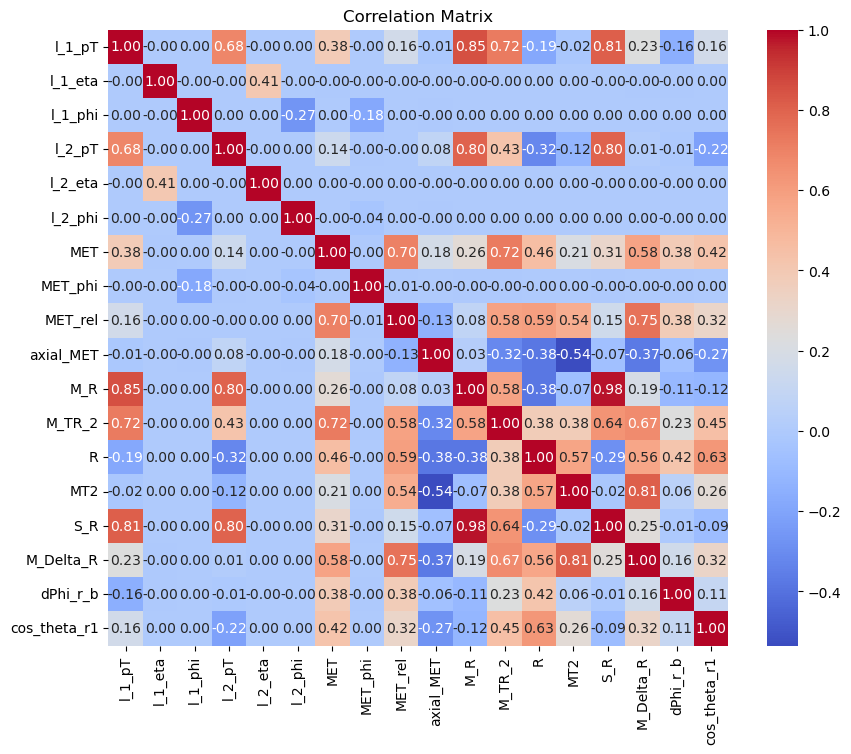

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix=df[observ].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [31]:
# MET and M_TR_2 are highly correlated, and changing the order increased threshold cut for M_TR_2.
# It appears that the order of cuts matter

sig_cut1=sig[sig['M_TR_2']>30]
bck_cut1=bck[bck['M_TR_2']>30]

thresholds=np.linspace(df['MET'].min(),df['MET'].max(),100)
sig_vals=[]
for t in thresholds:
    s=(sig_cut1['MET']>t).sum()
    b=(bck_cut1['MET']>t).sum()
    sig_vals.append(calculate(s,b))

best_MET_threshold=thresholds[np.argmax(sig_vals)]
print(f"MET threshold after M_TR_2 cut:{best_MET_threshold}")


sig_cut_MET=sig[sig['MET']>0.0007]
bck_cut_MET=bck[bck['MET']>0.0007]

thresholds=np.linspace(df['M_TR_2'].min(), df['M_TR_2'].max(), 100)
sig_vals=[]

for t in thresholds:
    s=(sig_cut_MET['M_TR_2']>t).sum()
    b=(bck_cut_MET['M_TR_2']>t).sum()
    sig_vals.append(calculate(s,b))

best_MTR2_after_MET=thresholds[np.argmax(sig_vals)]
max_sig=max(sig_vals)

print(f"M_TR_2 threshold after MET cut: {best_MTR2_after_MET}")


MET threshold after M_TR_2 cut:0.0007088767597451806
M_TR_2 threshold after MET cut: 0.6757382040448261


**7.1**

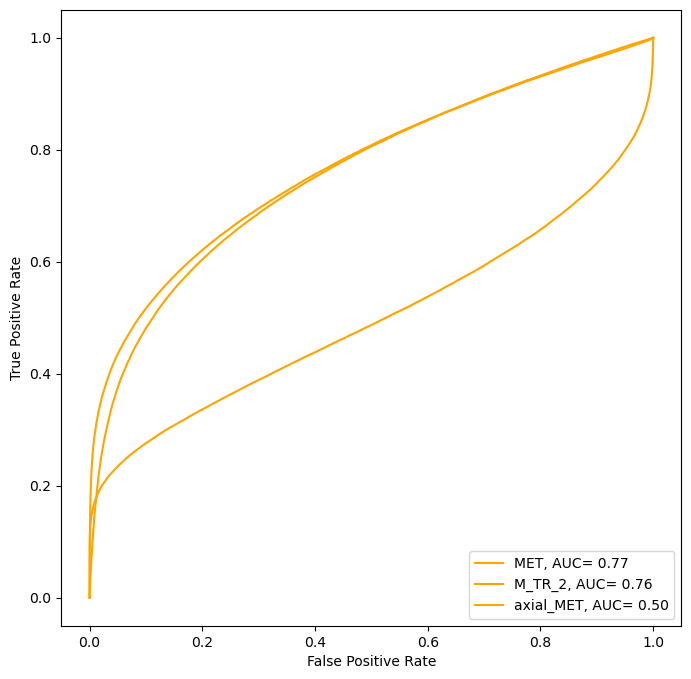

In [32]:

from sklearn.metrics import roc_curve, auc

observables=['MET', 'M_TR_2', 'axial_MET']
plt.figure(figsize=(8,8))

for o in observables:
    fpr,tpr,_=roc_curve(df['signal'],df[o])
    roc_auc=auc(fpr,tpr)

    plt.plot(fpr,tpr,color='orange',label=f'{o}, AUC={roc_auc: .2f}')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

**7.2**

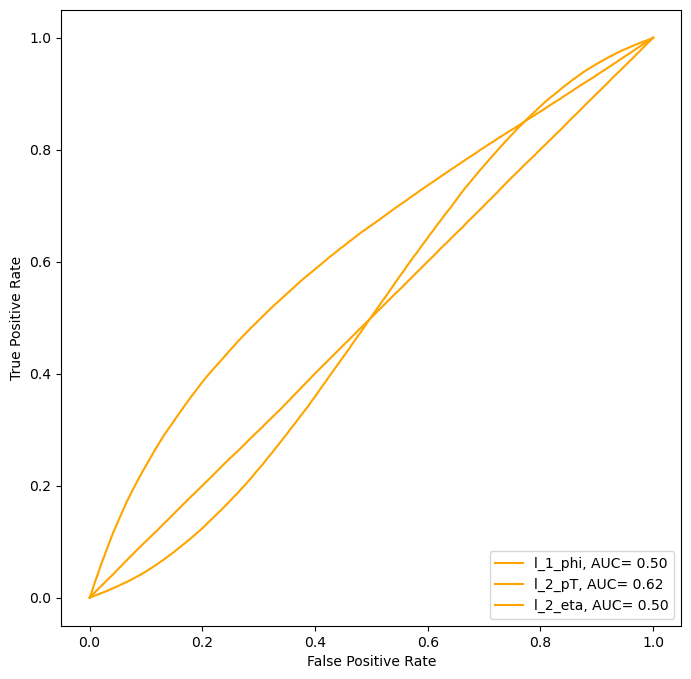

In [33]:
def plot(df,observables,column='signal'):
    plt.figure(figsize=(8,8))

    for o in observables:
        fpr,tpr,_=roc_curve(df['signal'],df[o])
        roc_auc=auc(fpr,tpr)

        plt.plot(fpr,tpr,color='orange',label=f'{o}, AUC={roc_auc: .2f}')
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Testing
observables=["l_1_phi", "l_2_pT", "l_2_eta"]
plot(df,observables)

**7.3**

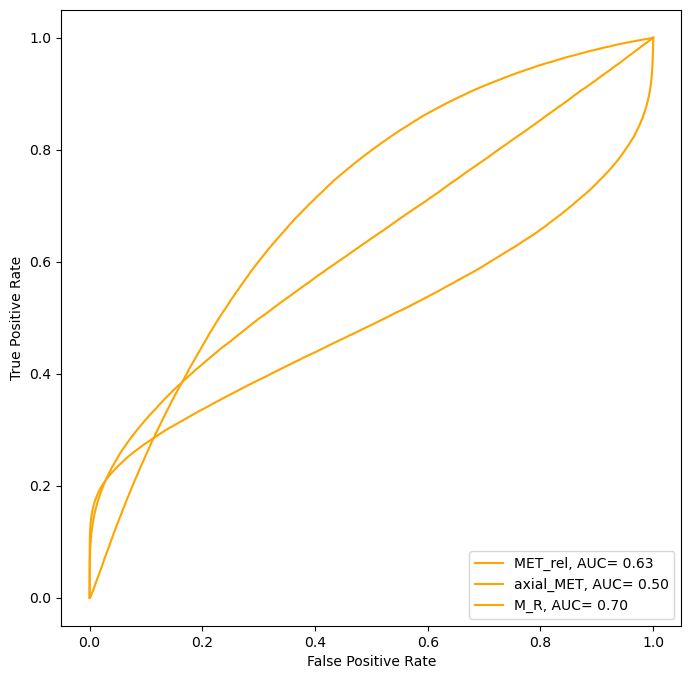

In [34]:

def plot(df,observables,column='signal'):
    plt.figure(figsize=(8,8))

    for o in observables:
        fpr,tpr,_=roc_curve(df['signal'],df[o])
        roc_auc=auc(fpr,tpr)

        plt.plot(fpr,tpr,color='orange',label=f'{o}, AUC={roc_auc: .2f}')
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Testing
observables=['MET_rel', 'axial_MET', 'M_R']
plot(df,observables)


**8.1**

In [47]:
import numpy as np

sig=df[df.signal==1]
bkg=df[df.signal==0]

mu_sig=np.mean(sig)
mu_bkg=np.mean(bkg)

sw_sig=np.cov(sig.T)
sw_bkg=np.cov(bkg.T)

sw=sw_sig+sw_bkg

n_sig=len(sig)
n_bkg=len(bkg)
total=n_sig+n_bkg
mu_total=(n_sig*mu_sig+n_bkg*mu_bkg)/total

sb=n_sig*np.outer(mu_sig-mu_total,mu_sig-mu_total)+n_bkg*np.outer(mu_bkg-mu_total,mu_bkg-mu_total)

w=np.linalg.pinv(sw).dot(mu_sig-mu_bkg)

#testing
print(sb)
print(w)
print(sw)

[[8987.27186078]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.00324555e+00  6.67405966e-04  4.57255884e-05
  -2.83580636e-01  1.08897109e-04 -1.73590399e-03  4.04262528e-01
  -4.84145060e-04 -2.78020894e-01  1.52016338e-02 -8.35444461e+00
  -3.41809208e+00 -3.92852876e-01  2.76562675e-01  6.59967586e+00
   8.94317489e-01  7.69332075e-01 -3.13115204e-01]
 [ 0.00000000e+00  6.67405966e-04  1.63068524e-01  2.48819223e-04
   1.92959918e-04 -6.55176944e-02  2.75618863e-04  1.09565816e-03
   1.25301706e-04 -1.22511223e-05 -4.62541813e-04 -7.66995904e-04
  -1.03449131e-03 -1.90947725e-03 -5.56402578e-04 -5.37126076e-04
   1.64822939e-03  6.09008705e-04 -7.77252536e-04]
 [ 0.00000000e+00  4.57255884e-05  2.

**8.2**

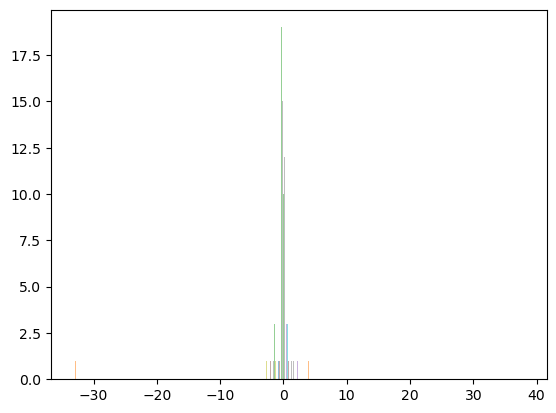

In [51]:
sw_1=np.linalg.pinv(sw)
diff=mu_sig-mu_bkg
w=np.dot(sw_1,diff)

plt.hist(w,bins=100,alpha=0.5)
plt.show()

**8.3**

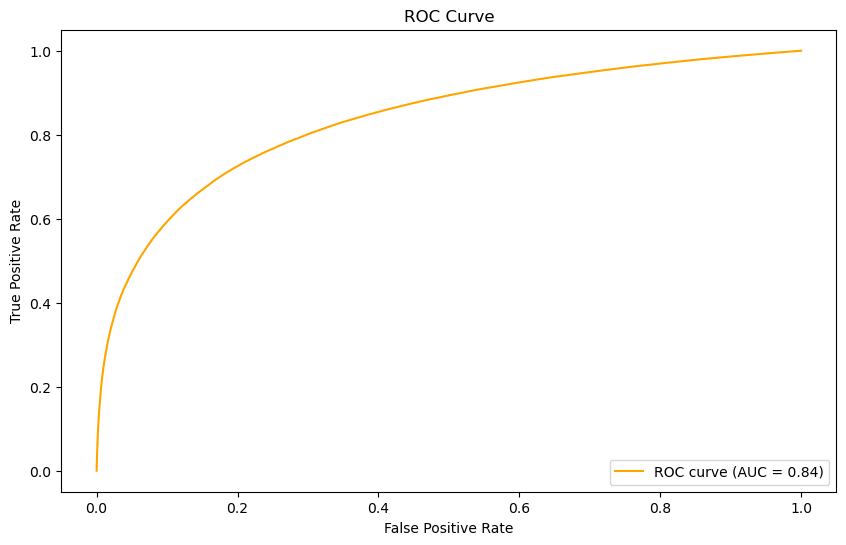

In [75]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


discriminant_sig=np.dot(sig, w)
discriminant_bkg=np.dot(bkg, w)

true_labels=np.concatenate([np.ones(n_sig), np.zeros(n_bkg)])  
predicted_scores=np.concatenate([discriminant_sig, discriminant_bkg])


fpr, tpr, _ = roc_curve(true_labels, predicted_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='orange',label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()